In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Load the training and testing data from the CSV files
train_data = pd.read_csv('/content/sample_data/Corona_NLP_train.csv', encoding='latin1')
test_data = pd.read_csv('/content/sample_data/Corona_NLP_test.csv', encoding='latin1')



In [2]:
# Step 2: Inspect the data structure
# Display the first few rows of the training data to understand its structure
print("Training Data Head:")
train_data.head()


Training Data Head:


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Age
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,37
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,47
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,23
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,18
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,27


In [3]:
# Step 3: Check the columns and data types
print("\nTraining Data Columns:")
print(train_data.columns)



Training Data Columns:
Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'Age'],
      dtype='object')


In [4]:
# Step 4: Check for null values and data types
print("\nTraining Data Info:")
print(train_data.info())



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
 6   Age            41157 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.2+ MB
None


<ipython-input-5-1f4d7a3083ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Sentiment', palette='viridis')


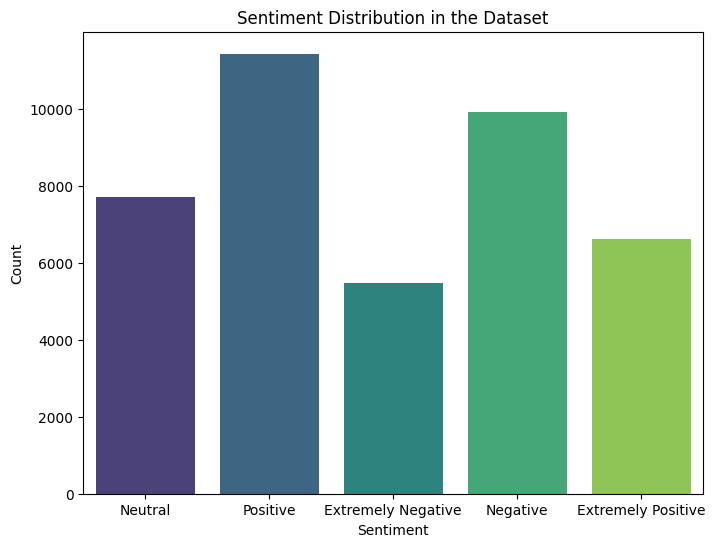

In [5]:
# Step 6: Visualize the distribution of sentiments
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

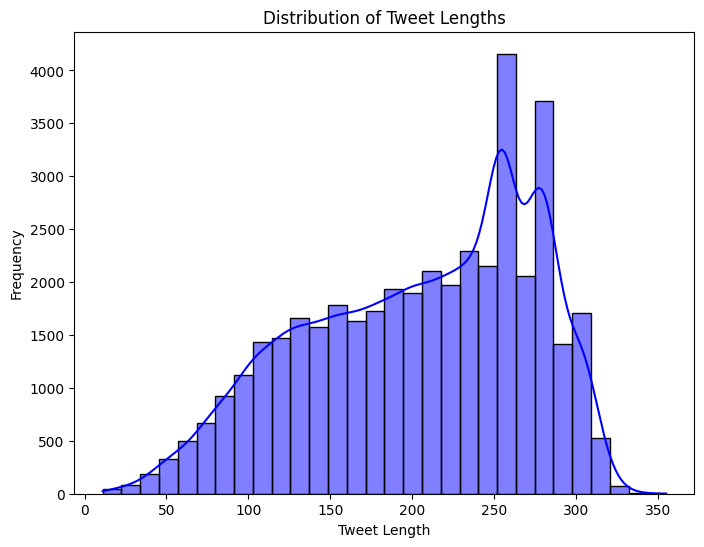

In [6]:
# Step 7: Examine the text length distribution
# Add a column for the length of each tweet
train_data['TweetLength'] = train_data['OriginalTweet'].apply(len)

# Visualize the distribution of tweet lengths
plt.figure(figsize=(8,6))
sns.histplot(train_data['TweetLength'], kde=True, color='blue', bins=30)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


In [7]:
# Step 8: Sample tweets for each sentiment
sample_texts = {}
for sentiment in train_data['Sentiment'].unique():
    sample_texts[sentiment] = train_data[train_data['Sentiment'] == sentiment]['OriginalTweet'].sample(1).values[0]

print("\nSample Texts by Sentiment:")
for sentiment, text in sample_texts.items():
    print(f"Sentiment: {sentiment}")
    print(f"Sample Text: {text}\n")


Sample Texts by Sentiment:
Sentiment: Neutral




#telemedicine #digitalhealthcare #covid19news

Sentiment: Positive
Sample Text: At we believe in the power of and our ability to make it through 19   We are offering for laboratories who are facing uncertain times with discounted prices at   to help you digitize your research

Sentiment: Extremely Negative

https://t.co/woJgZO5Bsz https://t.co/2s1AlJdwDD

Sentiment: Negative

https://t.co/Anw0gdBwBm #coronavirus #CoronaVirusUpdates #BorisJohnson #vonderLeyen #consumers #FBPE

Sentiment: Extremely Positive
Sample Text: @JimmyHavoc looks like me trying to go to the grocery store while having coronavirus.. ÂMy eyes? Ummm..I didnÂt sleep well last night..IÂm totally not sick.Â #AEWDynamite #JimmyHavoc #Coronavirus https://t.co/LeR2WaeEvX




Updated Emotion Mapping Preview:
            Sentiment    emotion
0             Neutral    Neutral
1            Positive  Happiness
2            Positive  Happiness
3            Positive  Happiness
4  Extremely Negative      Anger


<ipython-input-8-016cec882f51>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='emotion', palette='coolwarm')


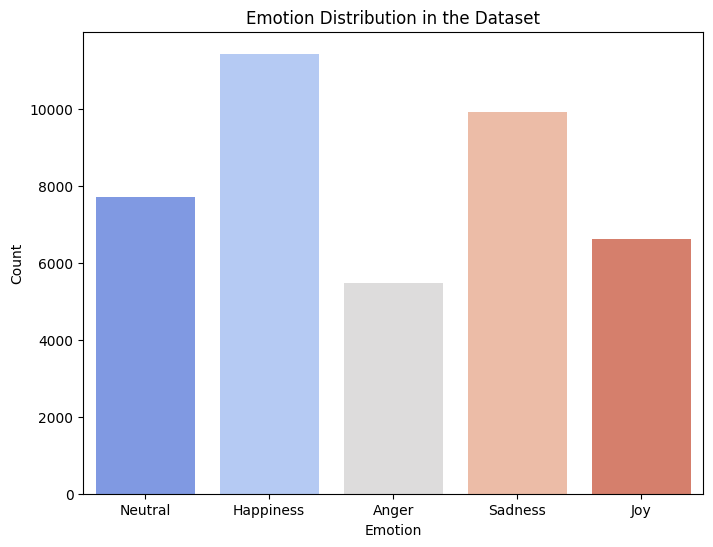


Emotion Distribution:
emotion
Happiness    11422
Sadness       9917
Neutral       7713
Joy           6624
Anger         5481
Name: count, dtype: int64


In [8]:
# Step 9: Analyze if mapping to emotions is necessary
# Emotion mapping might be necessary if you need to classify into more granular emotions like 'anger', 'happiness', etc.
# For now, we'll map the sentiments to some basic emotions as an example.

emotion_mapping = {
    'Neutral': 'Neutral',
    'Positive': 'Happiness',
    'Extremely Positive': 'Joy',
    'Negative': 'Sadness',
    'Extremely Negative': 'Anger'
}

train_data['emotion'] = train_data['Sentiment'].map(emotion_mapping)

# Preview the updated dataset with emotion mapping
print("\nUpdated Emotion Mapping Preview:")
print(train_data[['Sentiment', 'emotion']].head())

# Step 10: Visualize the distribution of emotions after mapping
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='emotion', palette='coolwarm')
plt.title('Emotion Distribution in the Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

# Step 11: Summary of the dataset
print("\nEmotion Distribution:")
print(train_data['emotion'].value_counts())


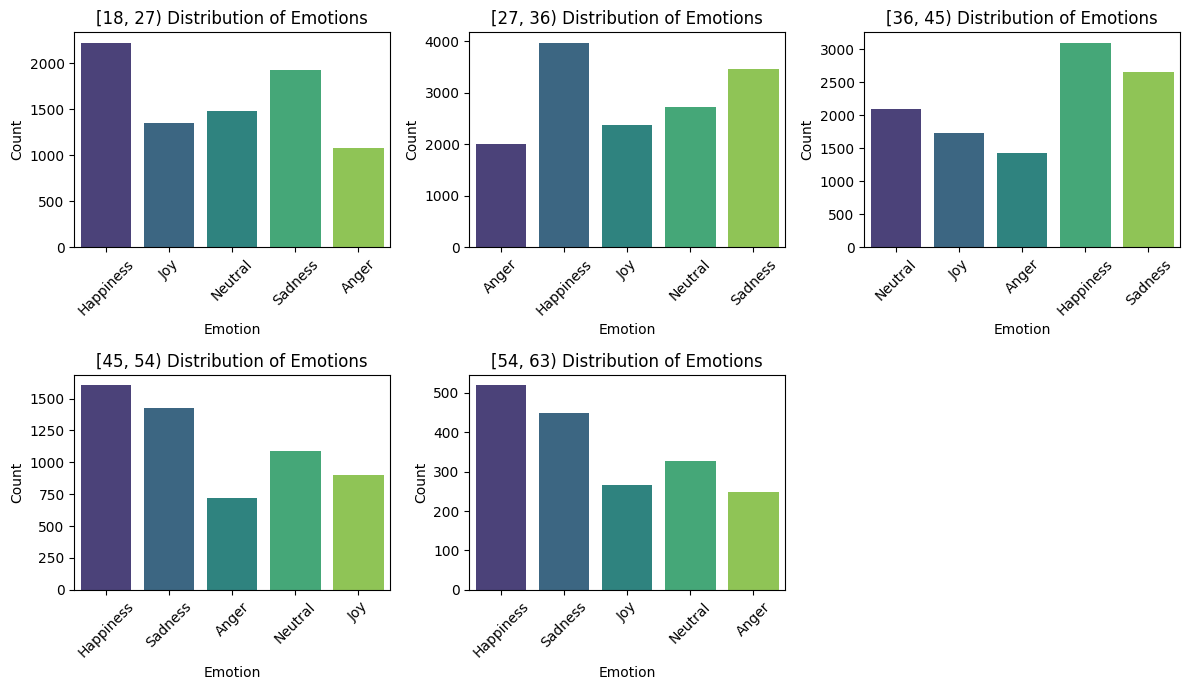

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define age intervals (age range 18-70, interval size 9)
age_intervals = pd.cut(train_data['Age'], bins=range(18, 71, 9), right=False)

# Add the 'AgeInterval' column to the dataset
train_data['AgeInterval'] = age_intervals

# Create a list of emotions (Sentiment in the dataset)
emotions = train_data['emotion'].unique()

# Set up the plot grid (3 plots per row)
num_plots = len(age_intervals.cat.categories)
fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(12, (num_plots // 3 + 1) * 3.5))
axes = axes.flatten()  # Flatten to make indexing easier

# Iterate through each age interval and plot its emotion distribution
for idx, age_group in enumerate(age_intervals.cat.categories):
    ax = axes[idx]  # Get the appropriate axis for the plot
    age_data = train_data[train_data['AgeInterval'] == age_group]

    # Count the occurrences of each emotion within the age interval
    sns.countplot(data=age_data, x='emotion', ax=ax, hue='emotion', palette='viridis', legend=False)

    # Set plot titles and labels
    ax.set_title(f'{age_group} Distribution of Emotions')
    ax.set_xlabel('Emotion')
    ax.set_ylabel('Count')

    # Adjust x-tick labels for better readability
    ax.set_xticks(range(len(age_data['emotion'].unique())))
    ax.set_xticklabels(age_data['emotion'].unique(), rotation=45)

# Hide any unused axes (empty plots)
for i in range(num_plots, len(axes)):
    axes[i].axis('off')  # Turn off the unused axes

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [9]:
# Import necessary libraries
import re
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 12: Data Preprocessing
# Data Cleaning - Remove unwanted characters, URLs, and excessive punctuation
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphabetic characters, keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove excessive spaces
    text = ' '.join(text.split())
    return text

# Apply data cleaning to the 'OriginalTweet' column
train_data['CleanedTweet'] = train_data['OriginalTweet'].apply(clean_text)

In [10]:
# Step 13: Encode Labels - Convert emotions into numerical labels
label_encoder = LabelEncoder()
train_data['emotion_label'] = label_encoder.fit_transform(train_data['emotion'])

# Preview the cleaned data with the emotion labels
print("\nCleaned Data and Emotion Labels Preview:")
print(train_data[['CleanedTweet', 'emotion', 'emotion_label']].head())


Cleaned Data and Emotion Labels Preview:
                                        CleanedTweet    emotion  emotion_label
0                menyrbie philgahan chrisitv and and    Neutral              3
1  advice talk to your neighbours family to excha...  Happiness              1
2  coronavirus australia woolworths to give elder...  Happiness              1
3  my food stock is not the only one which is emp...  Happiness              1
4  me ready to go at supermarket during the covid...      Anger              0


In [11]:
# Step 14: Split Data into Training and Validation sets (80-20 split)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_data['CleanedTweet'], train_data['emotion_label'], test_size=0.2, random_state=42
)

In [12]:
# Step 15: Tokenization and Dataset Preparation
# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a custom PyTorch Dataset class for tokenization, padding, and attention masks
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # Tokenize the text and get the corresponding labels
        text = str(self.texts.iloc[idx])
        label = self.labels.iloc[idx]

        # Tokenize the text and create padding and attention masks
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length', # pad to max_length
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',  # return as pytorch tensors
        )

        # Return the tokenized input and the label
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Prepare the training and validation datasets using the custom Dataset class
train_dataset = EmotionDataset(train_texts, train_labels, tokenizer)
val_dataset = EmotionDataset(val_texts, val_labels, tokenizer)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
# Step 16: Create DataLoader for batching and shuffling
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Sample output of the tokenization process (first batch)
sample_batch = next(iter(train_dataloader))
print("\nSample Batch from Training DataLoader:")
print(f"Input IDs: {sample_batch['input_ids']}")
print(f"Attention Mask: {sample_batch['attention_mask']}")
print(f"Labels: {sample_batch['labels']}")

# Outcome: Data is now preprocessed, tokenized, and ready for BERT model input.










Sample Batch from Training DataLoader:
Input IDs: tensor([[  101,  2449,  4107,  ...,     0,     0,     0],
        [  101, 25283, 26147,  ...,     0,     0,     0],
        [  101,  2482,  2025,  ...,     0,     0,     0],
        ...,
        [  101,  2111,  4306,  ...,     0,     0,     0],
        [  101,  2130,  1999,  ...,     0,     0,     0],
        [  101, 10093, 13331,  ...,     0,     0,     0]])
Attention Mask: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
Labels: tensor([3, 1, 1, 4, 4, 0, 4, 1, 1, 2, 3, 4, 1, 3, 4, 0])


In [14]:
pip install matplotlib seaborn wordcloud pandas numpy


<ipython-input-15-ec49b31fa96e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=train_data, palette="Set2")


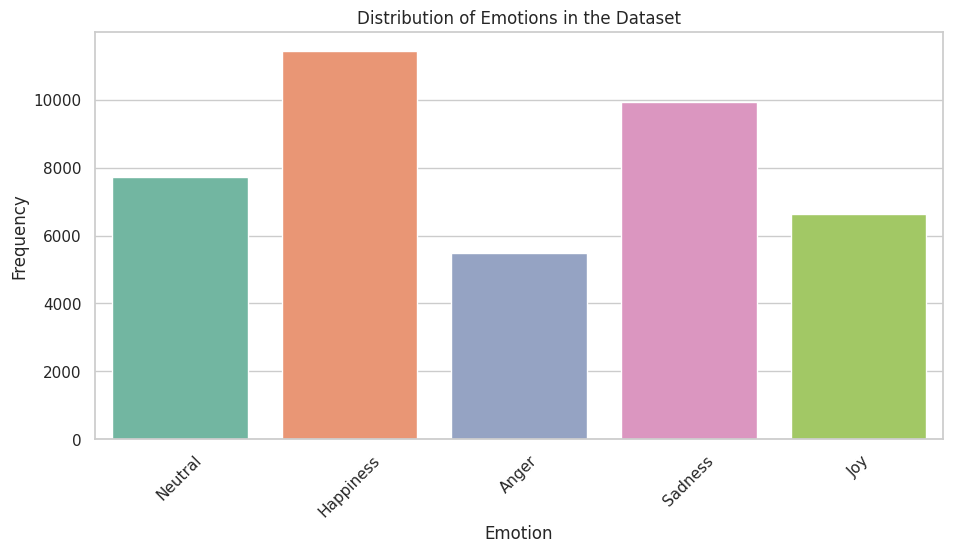

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set visualization style
sns.set(style="whitegrid")

# Plotting the Emotion Distribution
def plot_emotion_distribution(train_data):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='emotion', data=train_data, palette="Set2")
    plt.title("Distribution of Emotions in the Dataset")
    plt.xlabel("Emotion")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout(pad=2.0)  # Adjust padding for better layout
    plt.show()

# Run the function
plot_emotion_distribution(train_data)


<ipython-input-16-324b8194115a>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data['date'] = pd.to_datetime(train_data['TweetAt'], errors='coerce')


<Figure size 1200x800 with 0 Axes>

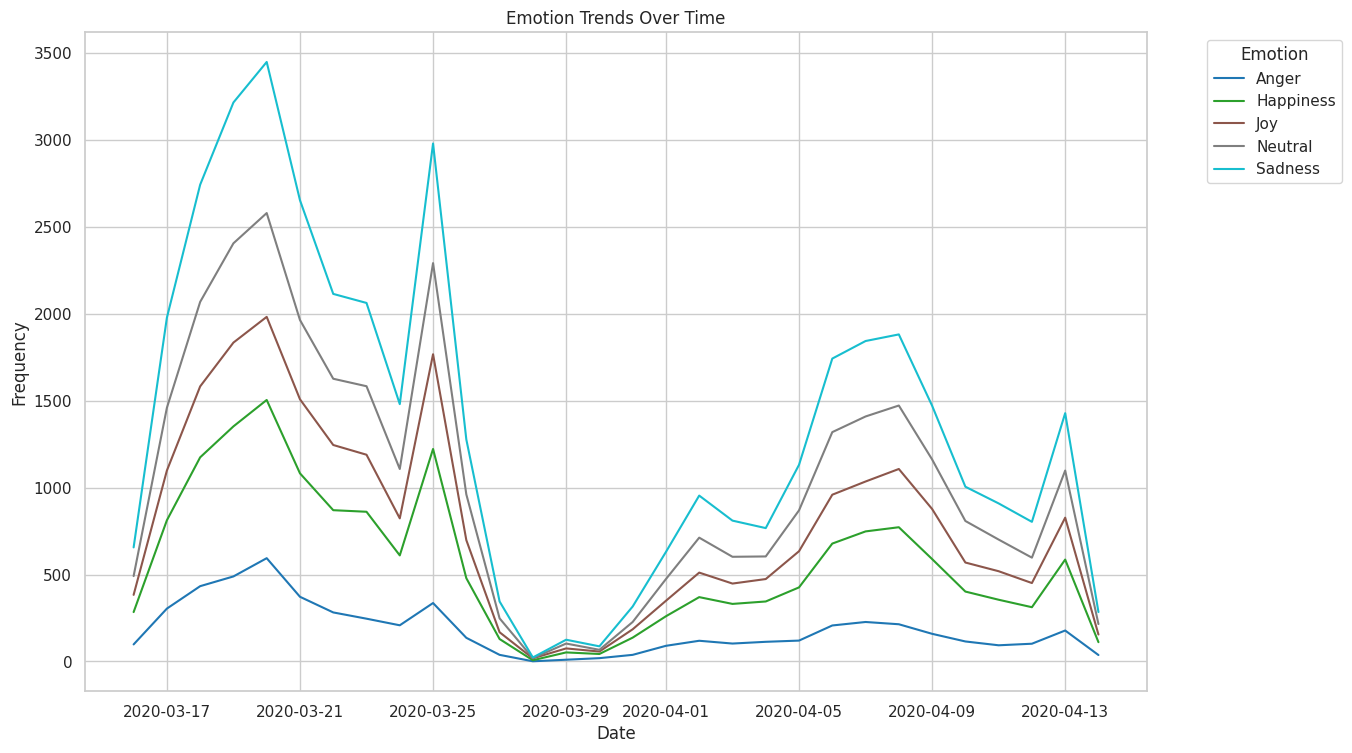

In [16]:
# Assuming the 'date' column is available in the 'train_data'
train_data['date'] = pd.to_datetime(train_data['TweetAt'], errors='coerce')

# Group by date and emotion label to find trends over time
emotion_by_date = train_data.groupby([train_data['date'].dt.date, 'emotion']).size().unstack(fill_value=0)

# Plotting Emotion Over Time
def plot_emotion_over_time():
    plt.figure(figsize=(12, 8))
    emotion_by_date.plot(kind='line', stacked=True, figsize=(14, 8), colormap='tab10')
    plt.title("Emotion Trends Over Time")
    plt.xlabel("Date")
    plt.ylabel("Frequency")
    plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(pad=2.0)  # Adjust padding for better layout
    plt.show()

# Run the function
plot_emotion_over_time()


In [17]:
pip install googlemaps


  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40715 sha256=e948dea00bd8109f5a0cbd882bf3847b886177eae796a3c5daca25c34af111f9
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps


In [18]:
import pandas as pd
from geopy.geocoders import Nominatim
from concurrent.futures import ThreadPoolExecutor
import time
import random
import re
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Initialize the geolocator (use Nominatim)
geolocator = Nominatim(user_agent="emotion_locator", timeout=10)

# Cache location results to avoid re-geocoding the same locations
location_cache = {}

# Function to resolve a location with retry mechanism for error 503 (Service Unavailable)
def resolve_location(location):
    if pd.isna(location) or location.strip() == "":
        return None, None, 'Unknown'

    # Skip locations that look like invalid coordinates or are too generic
    if re.search(r"[^a-zA-Z0-9\s,]", location):
        return None, None, 'Invalid location'

    # Check cache first to avoid redundant geocoding
    if location in location_cache:
        return location_cache[location]

    retries = 3
    while retries > 0:
        try:
            location_info = geolocator.geocode(location, language='en', addressdetails=True)
            if location_info:
                lat, lon = location_info.latitude, location_info.longitude
                country = location_info.raw.get('address', {}).get('country', 'Unknown')
                location_cache[location] = (lat, lon, country)
                return lat, lon, country
            else:
                location_cache[location] = (None, None, 'Unknown')
                return None, None, 'Unknown'
        except Exception as e:
            if '503' in str(e):
                print(f"Error geocoding {location}: {e}. Retrying...")
                time.sleep(random.uniform(1, 3))
            else:
                print(f"Error geocoding {location}: {e}")
                break

        retries -= 1

    location_cache[location] = (None, None, 'Unknown')
    return None, None, 'Unknown'

# Function to geocode locations in parallel using ThreadPoolExecutor
def geocode_batch(locations):
    with ThreadPoolExecutor(max_workers=10) as executor:
        return list(executor.map(resolve_location, locations))

# Ensure train_data is loaded correctly and has more than 5000 rows
if 'train_data' in locals() and not train_data.empty:
    if len(train_data) >= 1000:
        train_data_sampled = train_data.sample(n=5000, random_state=42)
    else:
        print(f"train_data has less than 5000 rows, selecting all {len(train_data)} rows")
        train_data_sampled = train_data

    if 'Location' in train_data_sampled.columns:
        # Extract the location column for geocoding
        locations = train_data_sampled['Location'].tolist()

        # Measure the time for geocoding
        start_time = time.time()

        # Geocode the locations in parallel
        results = geocode_batch(locations)

        # Assign the results back to the DataFrame
        train_data_sampled['Latitude'], train_data_sampled['Longitude'], train_data_sampled['Country'] = zip(*results)

        # Remove rows where geocoding failed
        train_data_sampled = train_data_sampled.dropna(subset=['Latitude', 'Longitude'])

        # Count emotions by country
        emotion_count_by_country = {}
        for _, row in train_data_sampled.iterrows():
            emotion = row['emotion']
            country = row['Country']
            if country not in emotion_count_by_country:
                emotion_count_by_country[country] = {}
            if emotion not in emotion_count_by_country[country]:
                emotion_count_by_country[country][emotion] = 0
            emotion_count_by_country[country][emotion] += 1

        # End time and print the duration
        end_time = time.time()
        print(f"Processing time: {end_time - start_time:.2f} seconds")
    else:
        print("Error: 'Location' column not found in the dataset.")
else:
    print("Error: train_data is not loaded or is empty.")


Processing time: 466.90 seconds


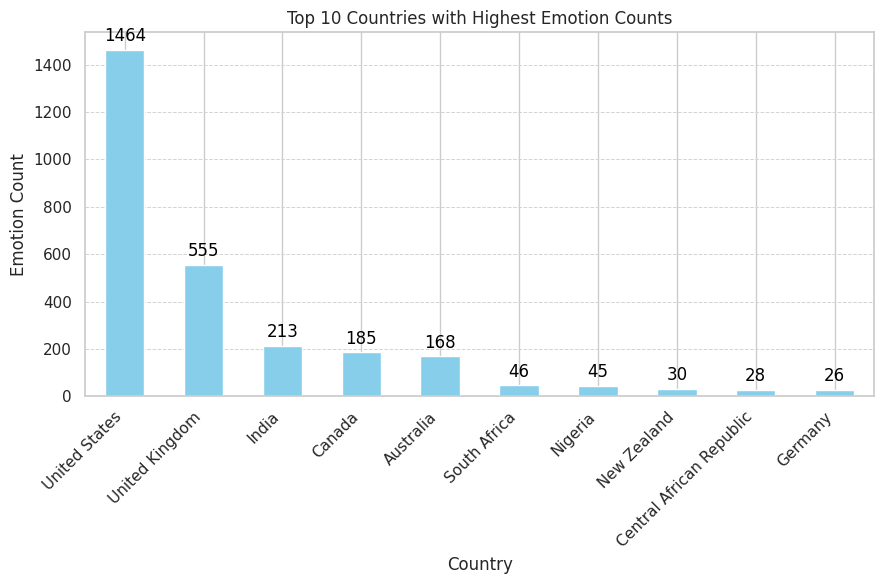

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame to store the emotion counts by country for easy plotting
emotion_counts = []

for country, emotions in emotion_count_by_country.items():
    for emotion, count in emotions.items():
        emotion_counts.append({'Country': country, 'Emotion': emotion, 'Count': count})

emotion_df = pd.DataFrame(emotion_counts)

# Get the top 10 countries with the highest emotion counts
top_countries = emotion_df.groupby('Country')['Count'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 countries with emotion counts
plt.figure(figsize=(9, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Highest Emotion Counts")
plt.xlabel("Country")
plt.ylabel("Emotion Count")
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='lightgrey')

# Annotate the bars with the count
for idx, value in enumerate(top_countries):
    plt.text(idx, value + 20, str(value), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

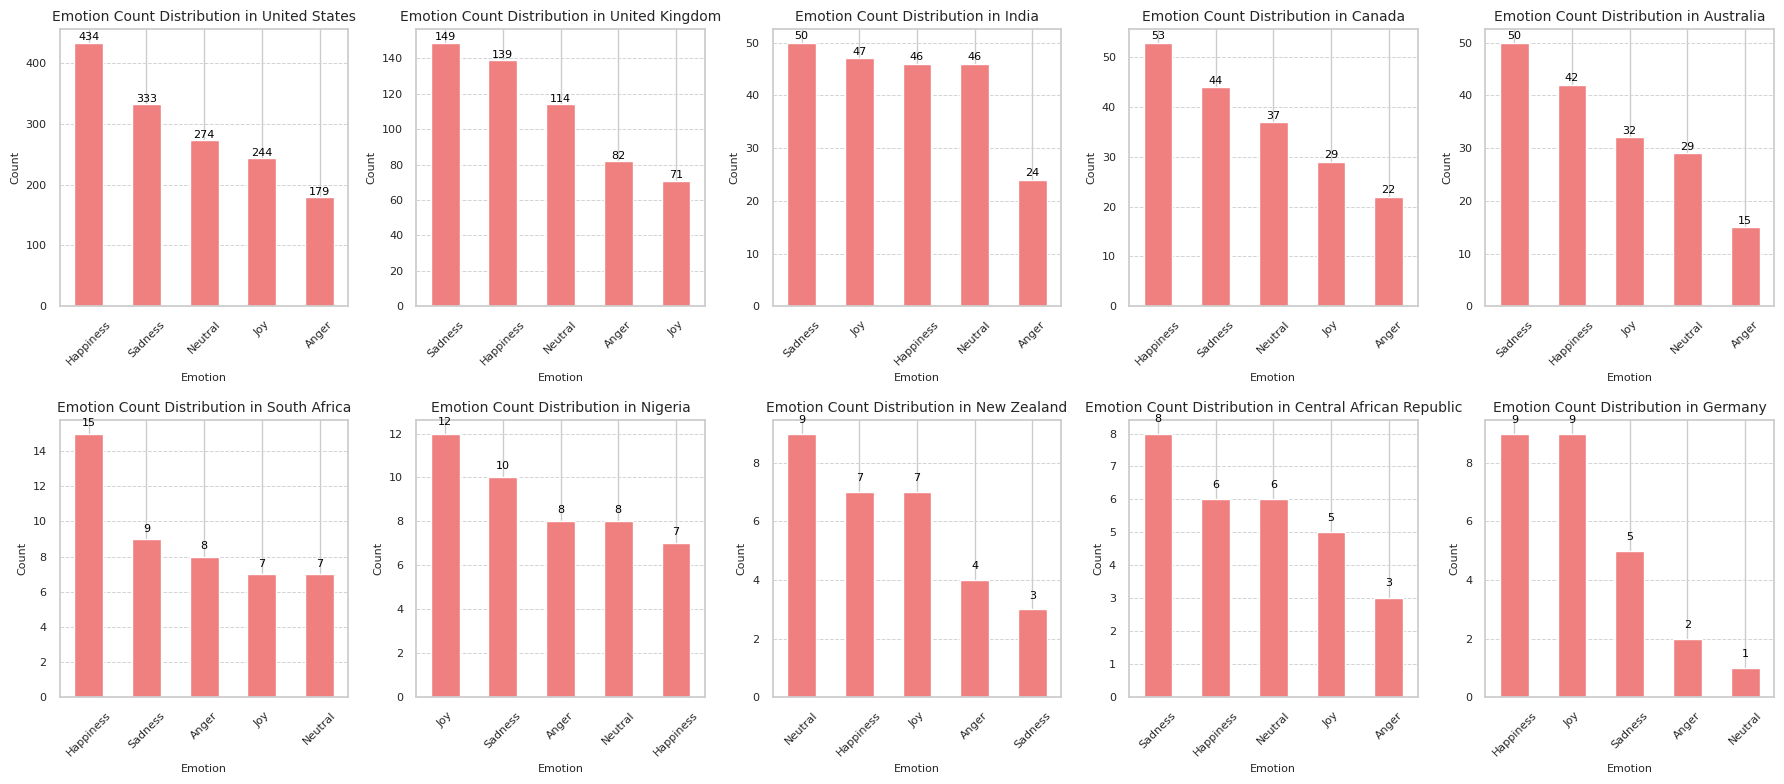

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame to store the emotion counts by country for easy plotting
emotion_counts = []

for country, emotions in emotion_count_by_country.items():
    for emotion, count in emotions.items():
        emotion_counts.append({'Country': country, 'Emotion': emotion, 'Count': count})

emotion_df = pd.DataFrame(emotion_counts)

# Get the top 10 countries with the highest emotion counts
top_countries = emotion_df.groupby('Country')['Count'].sum().sort_values(ascending=False).head(10)

# Number of rows and columns for the subplot grid
num_columns = 5  # Set 5 plots per row
num_rows = (len(top_countries) + num_columns - 1) // num_columns  # Calculate rows needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 4))  # Adjusted figsize for 5 plots per row

# Flatten axes for easy iteration (in case the grid is not a perfect square)
axes = axes.flatten()

# Plot the emotion counts for the top countries in the grid
for idx, country in enumerate(top_countries.index):
    country_emotions = emotion_df[emotion_df['Country'] == country]
    ax = country_emotions.groupby('Emotion')['Count'].sum().sort_values(ascending=False).plot(
        kind='bar',
        color='lightcoral',
        ax=axes[idx]
    )
    axes[idx].set_title(f"Emotion Count Distribution in {country}", fontsize=10)  # Reduced title font size
    axes[idx].set_xlabel("Emotion", fontsize=8)  # Reduced xlabel font size
    axes[idx].set_ylabel("Count", fontsize=8)  # Reduced ylabel font size
    axes[idx].tick_params(axis='x', rotation=45, labelsize=8)  # Reduced tick label size
    axes[idx].tick_params(axis='y', labelsize=8)  # Reduced tick label size
    axes[idx].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='lightgrey')

    # Annotate the bars with the count, reduced font size and moved slightly upwards
    for p in ax.patches:
        axes[idx].text(p.get_x() + p.get_width() / 2, p.get_height() + 0.3,  # Moved text upwards
                       f'{int(p.get_height())}', ha='center', va='bottom', color='black', fontsize=8)  # Reduced font size

# Hide any unused subplots if there are fewer than expected
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [21]:
import folium
from folium import IFrame
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Initialize the map centered at the world
m = folium.Map(location=[20, 0], zoom_start=2)

# Define a colormap to generate different colors for each emotion segment
color_map = cm.get_cmap('tab20')  # 20 distinct colors for variety

# Loop through each country in the dataset to create pie charts
for country, emotions in emotion_count_by_country.items():
    # Get the latitude and longitude for each country
    lat, lon, _ = location_cache.get(country, (None, None, 'Unknown'))
    if lat is None or lon is None:
        continue  # Skip countries without location data

    # Prepare data for the pie chart
    emotion_labels = list(emotions.keys())
    emotion_sizes = list(emotions.values())

    # Generate colors from the colormap for each emotion
    emotion_colors_used = [mcolors.to_hex(color_map(i / len(emotion_labels))) for i in range(len(emotion_labels))]

    # Create the pie chart for each country's emotion distribution
    fig, ax = plt.subplots(figsize=(2, 2))
    wedges, texts, autotexts = ax.pie(
        emotion_sizes,
        labels=emotion_labels,
        colors=emotion_colors_used,
        autopct='%1.1f%%',
        startangle=90
    )
    for text, color in zip(texts, emotion_colors_used):
        text.set_color(color)  # Set the color for each label to match the pie section

    plt.setp(autotexts, size=6, weight="bold", color="white")  # Set inner text properties

    # Save the plot to a PNG image in memory
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches="tight", dpi=80)
    plt.close(fig)
    buf.seek(0)
    encoded_image = base64.b64encode(buf.read()).decode("utf-8")

    # Create an HTML iframe with the image
    html = f'<img src="data:image/png;base64,{encoded_image}"/>'
    iframe = IFrame(html, width=250, height=250)
    popup = folium.Popup(iframe, max_width=300)

    # Add the pie chart popup to the map
    folium.Marker(
        location=[lat, lon],
        popup=popup,
        tooltip=f"{country} Emotion Distribution"
    ).add_to(m)

# Add a legend to the map in the bottom-left corner
legend_html = '''
    <div style="position: fixed;
                bottom: 30px; left: 10px; width: 150px; height: 200px;
                background-color: white; opacity: 0.8; z-index: 9999;
                border-radius: 5px; padding: 10px;">
        <h4 style="text-align: center;">Emotion Legend</h4>
        <ul style="list-style-type: none; padding: 0;">
            <li><span style="background-color: green; width: 10px; height: 10px; display: inline-block;"></span> Happy</li>
            <li><span style="background-color: blue; width: 10px; height: 10px; display: inline-block;"></span> Sad</li>
            <li><span style="background-color: red; width: 10px; height: 10px; display: inline-block;"></span> Angry</li>
            <li><span style="background-color: yellow; width: 10px; height: 10px; display: inline-block;"></span> Surprised</li>
            <li><span style="background-color: purple; width: 10px; height: 10px; display: inline-block;"></span> Fearful</li>
        </ul>
    </div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
m.save("emotion_map_with_pie_charts_all_countries.html")

# To display the map in a Jupyter notebook (if running in such an environment)
# m


<ipython-input-21-b0d75de788fe>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20')  # 20 distinct colors for variety


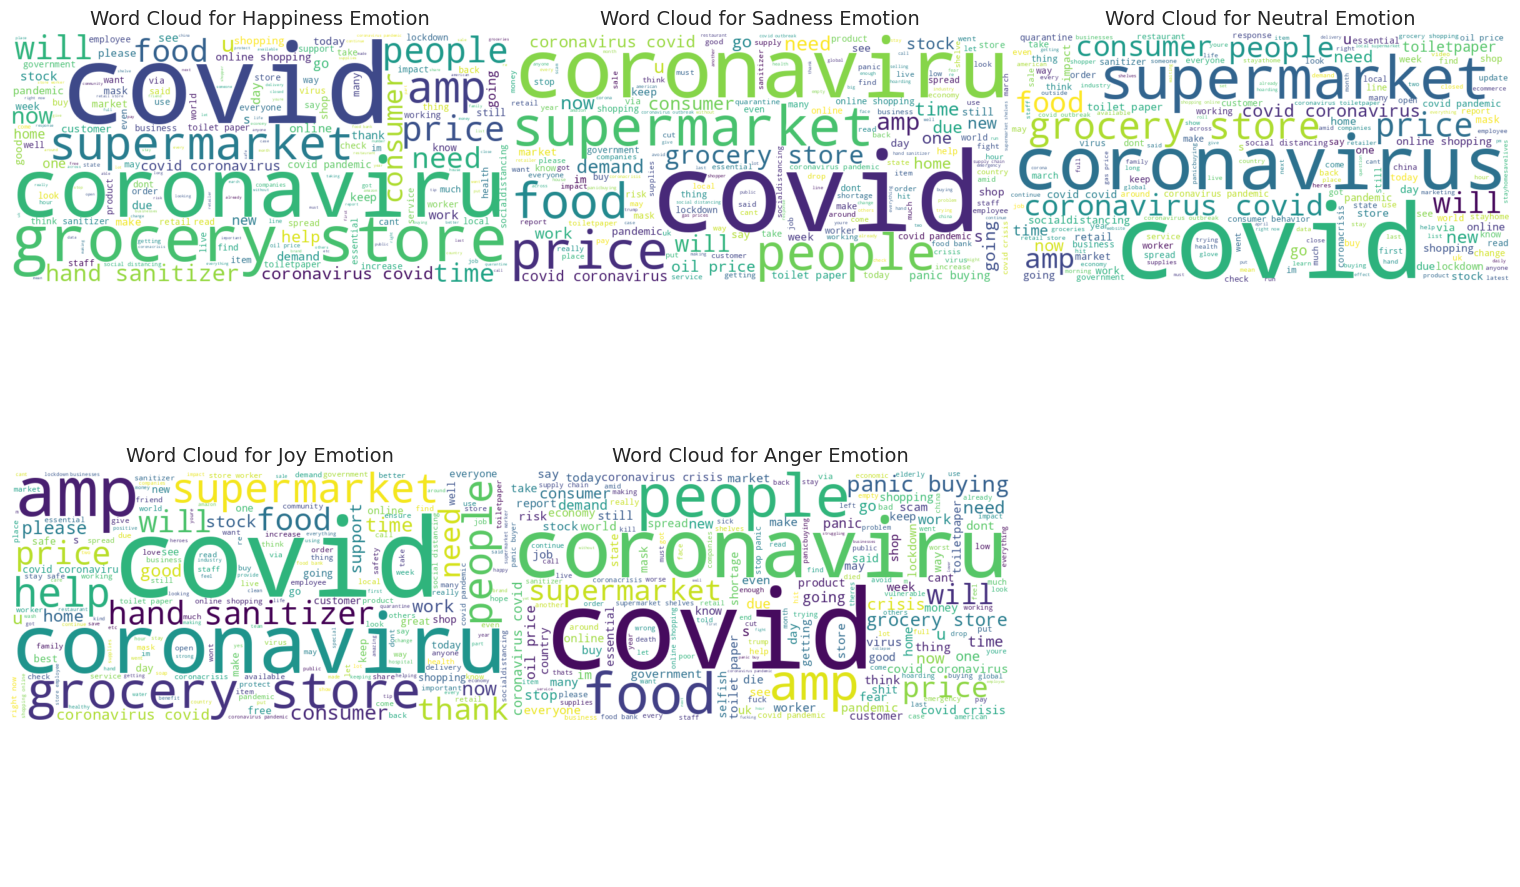

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate word cloud for a given emotion
def generate_wordcloud_for_emotion(emotion, ax):
    emotion_text = ' '.join(train_data[train_data['emotion'] == emotion]['CleanedTweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(emotion_text)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"Word Cloud for {emotion} Emotion", fontsize=14)

# Generate word clouds for top emotions in your dataset
top_emotions = train_data['emotion'].value_counts().head(5).index  # Top 5 emotions

# Create a figure with subplots arranged in 3 per row
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten to make it easy to iterate over

# Generate and plot word clouds for the top emotions
for i, emotion in enumerate(top_emotions):
    generate_wordcloud_for_emotion(emotion, axes[i])

# Remove empty subplot (if there are less than 6 emotions)
for i in range(len(top_emotions), len(axes)):
    axes[i].axis('off')  # Turn off axis for unused subplots

# Adjust layout to remove space between plots
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0)  # Remove all spacing
plt.tight_layout(pad=0)  # Set padding to 0

# Show the plots
plt.show()


In [23]:
!pip install nlpaug


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 25.3 MB/s eta 0:00:00


In [24]:
import torch
from torch import nn, optim
from transformers import BertForSequenceClassification, AdamW, BertTokenizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from torch.optim.lr_scheduler import CosineAnnealingLR
from nlpaug.augmenter.word import SynonymAug
from tqdm import tqdm
import numpy as np
from torch.utils.data import DataLoader
from torch.cuda.amp import autocast, GradScaler  # For mixed precision training

In [25]:
# Data Augmentation setup
aug = SynonymAug(aug_src='wordnet')

def augment_text(text, aug_probability=0.3):
    """Augments text with a given probability."""
    if np.random.rand() < aug_probability:
        return aug.augment(text)
    return text

org_train_data = train_data.copy()
train_data = train_data.sample(n=5000, random_state=42)
# Apply augmentation to training data
train_data['AugmentedTweet'] = train_data['CleanedTweet'].apply(lambda x: augment_text(x))
train_texts = train_data['AugmentedTweet']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [26]:
# Define Emotion Classifier Model with BERT
class EmotionClassifier(nn.Module):
    def __init__(self, freeze_bert_layers=True):
        super(EmotionClassifier, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained(
            'bert-base-uncased', num_labels=len(label_encoder.classes_)
        )

        # Optionally freeze initial BERT layers
        if freeze_bert_layers:
            for param in self.bert.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask, labels=None):
        return self.bert(input_ids=input_ids, attention_mask=attention_mask, labels=labels)

# Initialize model with device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = EmotionClassifier(freeze_bert_layers=True)
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


EmotionClassifier(
  (bert): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_feature

In [27]:
# Set up DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Optimizer, scheduler, and weighted loss
optimizer = AdamW(model.parameters(), lr=3e-5)
scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)

# Early stopping setup
best_val_accuracy = 0.0

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [28]:
# Mixed precision training setup
scaler = GradScaler()  # For mixed precision

# Training Function with mixed precision
def train_model(model, train_dataloader, val_dataloader, num_epochs=17):
    global best_val_accuracy
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        # Unfreeze BERT layers progressively
        if epoch == 1:
            for param in model.bert.bert.parameters():
                param.requires_grad = True

        for batch in tqdm(train_dataloader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Mixed precision training
            with autocast():  # Use autocast for lower precision computations
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss

            # Scaled loss backward pass for mixed precision
            scaler.scale(loss).backward()
            total_loss += loss.item()
            scaler.step(optimizer)
            scaler.update()  # Update the scaler after step

        # Validation step
        model.eval()
        val_preds, val_labels = [], []
        with torch.no_grad():
            for batch in val_dataloader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                val_preds.extend(torch.argmax(outputs.logits, axis=1).cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        # Calculate metrics
        accuracy = accuracy_score(val_labels, val_preds)
        f1 = f1_score(val_labels, val_preds, average='weighted')
        precision = precision_score(val_labels, val_preds, average='weighted')
        recall = recall_score(val_labels, val_preds, average='weighted')

        # Adjust learning rate
        scheduler.step()

        # Save the best model
        if accuracy > best_val_accuracy:
            best_val_accuracy = accuracy
            torch.save(model.state_dict(), 'best_model.pt')

        print(f"Epoch {epoch+1} - Loss: {total_loss/len(train_dataloader):.4f}, "
              f"Accuracy: {accuracy:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

# Train the model
train_model(model, train_dataloader, val_dataloader, num_epochs=7)

<ipython-input-28-a217c3fb4e15>:2: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()  # For mixed precision
Training Epoch 1/7:   0%|          | 0/1029 [00:00<?, ?it/s]<ipython-input-28-a217c3fb4e15>:23: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use autocast for lower precision computations
Training Epoch 1/7: 100%|██████████| 1029/1029 [01:26<00:00, 11.89it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1 - Loss: 1.5729, Accuracy: 0.2794, F1: 0.1310, Precision: 0.2921, Recall: 0.2794


Training Epoch 2/7:   0%|          | 0/1029 [00:00<?, ?it/s]<ipython-input-28-a217c3fb4e15>:23: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use autocast for lower precision computations
Training Epoch 2/7: 100%|██████████| 1029/1029 [03:36<00:00,  4.74it/s]


Epoch 2 - Loss: 0.8103, Accuracy: 0.7936, F1: 0.7932, Precision: 0.7982, Recall: 0.7936


Training Epoch 3/7:   0%|          | 0/1029 [00:00<?, ?it/s]<ipython-input-28-a217c3fb4e15>:23: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use autocast for lower precision computations
Training Epoch 3/7: 100%|██████████| 1029/1029 [03:28<00:00,  4.93it/s]


Epoch 3 - Loss: 0.4363, Accuracy: 0.8020, F1: 0.8014, Precision: 0.8124, Recall: 0.8020


Training Epoch 4/7:   0%|          | 0/1029 [00:00<?, ?it/s]<ipython-input-28-a217c3fb4e15>:23: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use autocast for lower precision computations
Training Epoch 4/7: 100%|██████████| 1029/1029 [03:26<00:00,  4.99it/s]


Epoch 4 - Loss: 0.2981, Accuracy: 0.8450, F1: 0.8453, Precision: 0.8467, Recall: 0.8450


Training Epoch 5/7:   0%|          | 0/1029 [00:00<?, ?it/s]<ipython-input-28-a217c3fb4e15>:23: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use autocast for lower precision computations
Training Epoch 5/7: 100%|██████████| 1029/1029 [03:25<00:00,  5.00it/s]


Epoch 5 - Loss: 0.1998, Accuracy: 0.8394, F1: 0.8393, Precision: 0.8437, Recall: 0.8394


Training Epoch 6/7:   0%|          | 0/1029 [00:00<?, ?it/s]<ipython-input-28-a217c3fb4e15>:23: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use autocast for lower precision computations
Training Epoch 6/7: 100%|██████████| 1029/1029 [03:26<00:00,  4.99it/s]


Epoch 6 - Loss: 0.1328, Accuracy: 0.8426, F1: 0.8422, Precision: 0.8437, Recall: 0.8426


Training Epoch 7/7:   0%|          | 0/1029 [00:00<?, ?it/s]<ipython-input-28-a217c3fb4e15>:23: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use autocast for lower precision computations
Training Epoch 7/7: 100%|██████████| 1029/1029 [03:26<00:00,  4.99it/s]


Epoch 7 - Loss: 0.0924, Accuracy: 0.8443, F1: 0.8441, Precision: 0.8444, Recall: 0.8443


In [29]:
import torch
from sklearn.metrics import accuracy_score, classification_report

# Load the best model (if you want to reload the saved model)
model.load_state_dict(torch.load('best_model.pt'))
model.to(device)

# Function to evaluate the model: Accuracy and Classification Report
def evaluate_model(model, val_dataloader):
    model.eval()  # Set model to evaluation mode
    val_preds, val_labels = [], []

    with torch.no_grad():  # No need to compute gradients during evaluation
        for batch in val_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Forward pass
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            val_preds.extend(torch.argmax(outputs.logits, axis=1).cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(val_labels, val_preds)
    print(f"Validation Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(val_labels, val_preds, target_names=label_encoder.classes_))

# Evaluate the model
evaluate_model(model, val_dataloader)


<ipython-input-29-2fb758dcbc1a>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pt'))


Validation Accuracy: 84.50%

Classification Report:
              precision    recall  f1-score   support

       Anger       0.81      0.88      0.85      1056
   Happiness       0.84      0.83      0.83      2287
         Joy       0.86      0.89      0.88      1330
     Neutral       0.92      0.84      0.88      1553
     Sadness       0.80      0.82      0.81      2006

    accuracy                           0.84      8232
   macro avg       0.85      0.85      0.85      8232
weighted avg       0.85      0.84      0.85      8232



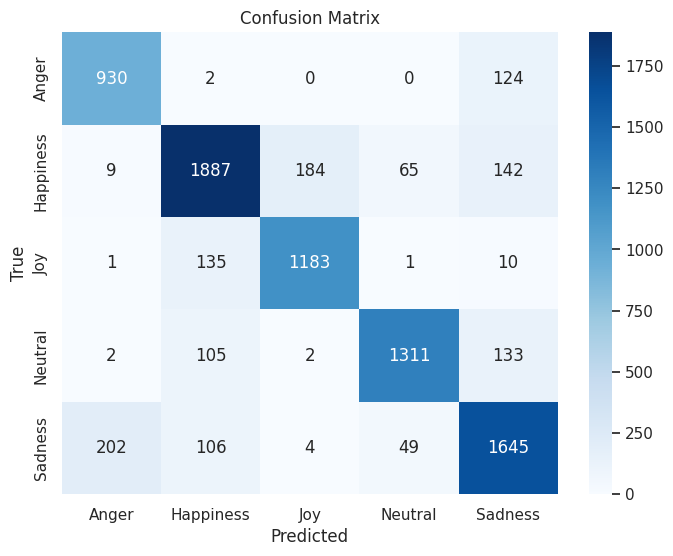

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(model, val_dataloader):
    model.eval()
    val_preds, val_labels = [], []

    with torch.no_grad():  # No need to compute gradients during evaluation
        for batch in val_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Forward pass
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            val_preds.extend(torch.argmax(outputs.logits, axis=1).cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    # Confusion Matrix
    cm = confusion_matrix(val_labels, val_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(model, val_dataloader)


In [31]:
"""
# Function to make predictions on new text samples
def predict(model, texts):
    model.eval()
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt').to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, axis=1).cpu().numpy()

    return predictions

# Example: Making predictions on a few samples from the validation set
sample_texts = val_data['CleanedTweet'][:5].tolist()  # Select 5 samples from validation data
predictions = predict(model, sample_texts)

print("\nPredictions on Sample Texts:")
for text, pred in zip(sample_texts, predictions):
    print(f"Text: {text} \nPredicted Emotion: {label_encoder.classes_[pred]}\n")
"""

NameError: name 'val_data' is not defined

In [33]:
# Updated function to make predictions on new text samples
def predict(model, texts):
    model.eval()
    # Tokenize texts without 'token_type_ids'
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt').to(device)
    inputs.pop("token_type_ids", None)  # Remove 'token_type_ids' if it's included

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, axis=1).cpu().numpy()

    return predictions

# Making predictions on the sample texts
sample_texts = [
    "I am very happy today!",
    "Feeling a bit down and sad.",
    "I'm so excited about the new project!",
    "I'm worried about my exams.",
    "What a wonderful day it has been!"
]

predictions = predict(model, sample_texts)

print("\nPredictions on Sample Texts:")
for text, pred in zip(sample_texts, predictions):
    print(f"Text: {text} \nPredicted Emotion: {label_encoder.classes_[pred]}\n")



Predictions on Sample Texts:
Text: I am very happy today! 
Predicted Emotion: Happiness

Text: Feeling a bit down and sad. 
Predicted Emotion: Sadness

Text: I'm so excited about the new project! 
Predicted Emotion: Joy

Text: I'm worried about my exams. 
Predicted Emotion: Sadness

Text: What a wonderful day it has been! 
Predicted Emotion: Joy

